In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics import tsaplots
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid
import random

In [3]:
ne_train = pd.read_csv("ne_train.csv")
ne_test = pd.read_csv("ne_test_new.csv")

s_train = pd.read_csv("s_train.csv")
s_test = pd.read_csv("s_test.csv")

In [4]:
columns = ['date', 'covid_19_confirmed_cases', 'num__daily_state_test', 
          'num__precipitation', 'num__temperature']
ne_train = ne_train[columns]
ne_test = ne_test[columns]

s_train = s_train[columns]
s_test = s_test[columns]

In [5]:
rename_mapping = {
    'date': 'ds',
    'covid_19_confirmed_cases': 'y',
    'num__daily_state_test': 'state_test', 
    'num__precipitation': 'precipitation', 
    'num__temperature' : 'temperature'
}

ne_train.rename(columns=rename_mapping, inplace=True)
ne_test.rename(columns=rename_mapping, inplace=True)

s_train.rename(columns=rename_mapping, inplace=True)
s_test.rename(columns=rename_mapping, inplace=True)

### Model Tuning and Building - NE

In [8]:
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.15,0.2,0.25],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)

In [46]:
X_train = ne_train
X_test = ne_test

start_train = ne_train['ds'].min()
end_train = ne_train['ds'].max()

start_val = ne_test['ds'].min()
end_val = ne_test['ds'].max()

In [61]:
model_df = pd.DataFrame(columns=['MAE', 'Parameters'])

In [62]:
for param in grid:
    print(param)
    
    ne_model = Prophet(
        changepoint_prior_scale=param['changepoint_prior_scale'],
        n_changepoints=param['n_changepoints'],
        seasonality_mode=param['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        interval_width=0.95
    )
    
    for regressor in ['state_test', 'precipitation', 'temperature']:  
        ne_model.add_regressor(regressor)
        
    ne_train = ne_train[(ne_train['ds'] > start_train) & (ne_train['ds'] <= end_train)][['ds', 'y', 'state_test', 'precipitation', 'temperature']]
    ne_model.fit(ne_train)
    
    ne_val = ne_test[(ne_test['ds'] > start_val) & (ne_test['ds'] <= end_val)][['ds', 'y', 'state_test', 'precipitation', 'temperature']]
    ne_forecast = ne_model.make_future_dataframe(periods = len(ne_val), freq = 'D', include_history=False)
    for regressor in ['state_test', 'precipitation', 'temperature']:
        ne_forecast[regressor] = ne_val[regressor].values
        
    ne_forecast = ne_model.predict(ne_forecast)
    test = ne_forecast[['ds', 'yhat']]
    
    Actual = ne_val[['ds', 'y']]

    MAE = mean_absolute_error(Actual['y'], abs(test['yhat']))
    print('Mean Absolute Error (MAE)------------------------------------', MAE)
     
    model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index = True)

13:30:59 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:30:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:00 - cmdstanpy - INFO - Chain [1] start processing
13:31:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 646.6659543858498
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE)------------------------------------ 4364.765563791424
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:31:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:00 - cmdstanpy - INFO - Chain [1] start processing
13:31:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 1095.5233686163463
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 4758.781417796995


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:01 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:31:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:01 - cmdstanpy - INFO - Chain [1] start processing
13:31:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 930.7432024892663
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE)------------------------------------ 4310.079431908011
{'changepoint_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:31:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:02 - cmdstanpy - INFO - Chain [1] start processing
13:31:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 751.0564705830808
{'changepoint_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE)------------------------------------ 4230.283281452246
{'changepoint_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:31:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:03 - cmdstanpy - INFO - Chain [1] start processing
13:31:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 982.8763313733524
{'changepoint_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE)------------------------------------ 3966.5369400401696
{'changepoint_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:31:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:04 - cmdstanpy - INFO - Chain [1] start processing
13:31:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 789.0155111554201
{'changepoint_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 4595.526887832395


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:04 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:31:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:05 - cmdstanpy - INFO - Chain [1] start processing
13:31:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 672.8412570518273
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE)------------------------------------ 4200.816505148783
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:31:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:06 - cmdstanpy - INFO - Chain [1] start processing
13:31:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 1141.5460600260758
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 2761.7125230798065


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:06 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:31:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:07 - cmdstanpy - INFO - Chain [1] start processing
13:31:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 907.5197120508301
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 3516.831893266766


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:08 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:31:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:08 - cmdstanpy - INFO - Chain [1] start processing
13:31:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 775.0670628649575
{'changepoint_prior_scale': 0.25, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 2754.4599470978874


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:09 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:31:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:09 - cmdstanpy - INFO - Chain [1] start processing
13:31:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 868.1021153581652
{'changepoint_prior_scale': 0.25, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 2926.367957866044
{'changepoint_prior_scale': 0.25, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:10 - cmdstanpy - INFO - Chain [1] start processing
13:31:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
13:31:10 - cmdstanpy - INFO - Chain [1] start processing
13:31:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 868.0115130776596
{'changepoint_prior_scale': 0.25, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 3066.536209595189


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_18705/2058948198.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)


In [71]:
print('best params: {changepoint_prior_scale: 0.1, n_changepoints: 100, seasonality_mode: multiplicative}')

best params: {changepoint_prior_scale: 0.1, n_changepoints: 100, seasonality_mode: multiplicative}


In [79]:
ne_model = Prophet(
    changepoint_prior_scale = 0.1,n_changepoints = 100,
    seasonality_mode = 'multiplicative',weekly_seasonality = True,
    daily_seasonality = True,yearly_seasonality = True, interval_width = 0.95)

for regressor in ['state_test', 'precipitation', 'temperature']:
    ne_model.add_regressor(regressor)
    
ne_model.fit(X_train)


13:38:28 - cmdstanpy - INFO - Chain [1] start processing
13:38:29 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
ne_future

,ds
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27
...,...
375,2021-02-01
376,2021-02-02
377,2021-02-03
378,2021-02-04


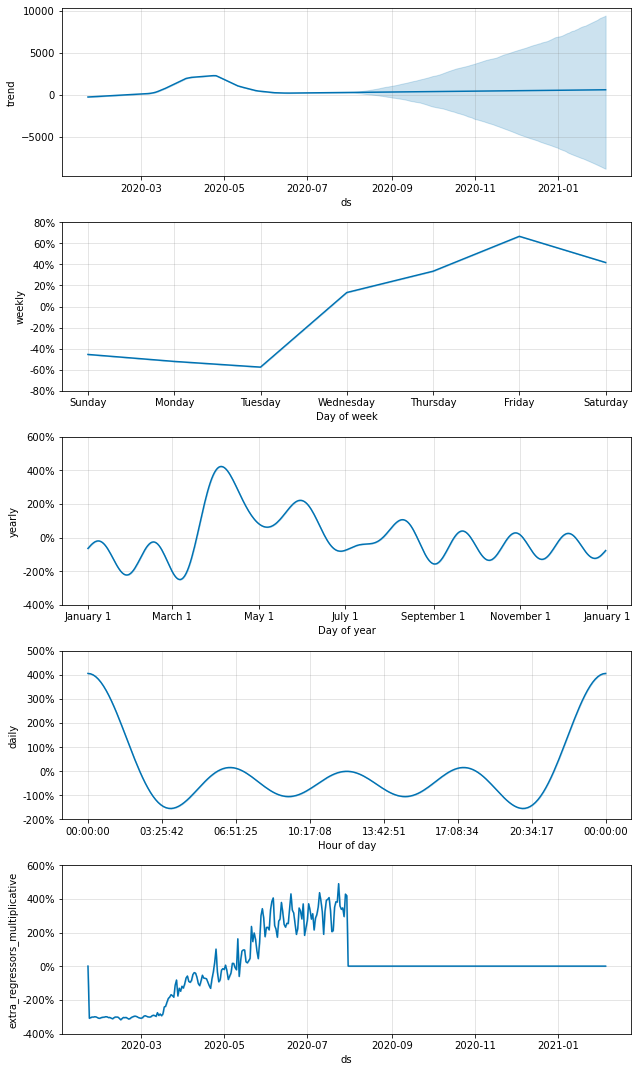

In [87]:
ne_future = ne_model.make_future_dataframe(periods=190, freq='D')

ne_future['state_test'] = ne_train['state_test']
ne_future['state_test'] = ne_future['state_test'].fillna(ne_future['state_test'].mean())

ne_future['precipitation'] = ne_train['precipitation']
ne_future['precipitation'] = ne_future['precipitation'].fillna(ne_future['state_test'].mean())

ne_future['temperature'] = ne_train['temperature']
ne_future['temperature'] = ne_future['state_test'].fillna(ne_future['state_test'].mean())

ne_forecast = ne_model.predict(ne_future)

ne_plots = ne_model.plot_components(ne_forecast)

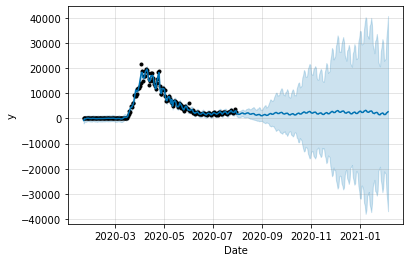

In [95]:
f, ax = plt.subplots(1)
fig = ne_model.plot(ne_forecast,ax=ax)
plt.xlabel('Date')
plt.show()

In [89]:
ne_test_pred = ne_model.predict(ne_test)

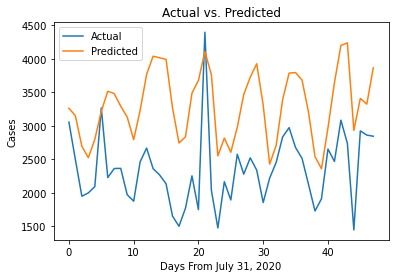

In [90]:
plt.plot(ne_test['y'], label = 'Actual')
plt.plot(ne_test_pred['yhat'], label = 'Predicted')
plt.xlabel('Days From July 31, 2020')
plt.ylabel('Cases')
plt.title('Actual vs. Predicted')
plt.legend()

In [91]:
mean_absolute_error(ne_test['y'],abs(ne_test_pred['yhat']))

976.3915819270564

### Model - South

In [6]:
X_train = s_train
X_test = s_test

start_train = s_train['ds'].min()
end_train = s_train['ds'].max()

strt_val = s_test['ds'].min()
end_val = s_test['ds'].max()

In [11]:
model_df = pd.DataFrame(columns = ['MAE', 'Parameters'])

for param in grid:
    print(param)
    
    s_model = Prophet(
        changepoint_prior_scale=param['changepoint_prior_scale'],
        n_changepoints=param['n_changepoints'],
        seasonality_mode=param['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        interval_width=0.95
    )
    
    for regressor in ['state_test', 'precipitation', 'temperature']:  
        s_model.add_regressor(regressor)
        
    s_train = s_train[(s_train['ds'] > start_train) & (s_train['ds'] <= end_train)][['ds', 'y', 'state_test', 'precipitation', 'temperature']]
    s_model.fit(s_train)
    
    s_val = s_test[(s_test['ds'] > start_val) & (s_test['ds'] <= end_val)][['ds', 'y', 'state_test', 'precipitation', 'temperature']]
    s_forecast = s_model.make_future_dataframe(periods=len(s_val), freq='D', include_history=False)
    for regressor in ['state_test', 'precipitation', 'temperature']:
        s_forecast[regressor] = s_val[regressor].values
        
    s_forecast = s_model.predict(s_forecast)
    test = s_forecast[['ds', 'yhat']]
    
    Actual = s_val[['ds', 'y']]

    MAE = mean_absolute_error(Actual['y'], abs(test['yhat']))
    print('Mean Absolute Error (MAE)------------------------------------', MAE)
    
    model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)

19:48:03 - cmdstanpy - INFO - Chain [1] start processing
19:48:03 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 9609.152945889102


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:04 - cmdstanpy - INFO - Chain [1] start processing
19:48:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 14347.246130495367
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


19:48:04 - cmdstanpy - INFO - Chain [1] start processing
19:48:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 9599.336686159273
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 13949.21895633519


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 9599.336686159273
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 13949.21895633519
{'changepoint_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 10352.526450559619
{'changepoint_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 14557.523680125245
{'changepoint_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 10791.543568601855
{'changepoint_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 13476.156154196293
{'changepoint_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 10791.543568601855
{'changepoint_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 13476.156154196293
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 11487.233064031801
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 12731.14997243931
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 49692.04991991679


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 13145.232242931319
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 49692.04991991679
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 13145.232242931319
{'changepoint_prior_scale': 0.25, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)



Mean Absolute Error (MAE)------------------------------------ 15661.885890184853
{'changepoint_prior_scale': 0.25, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:08 - cmdstanpy - INFO - Chain [1] start processing
19:48:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 11730.275321942674
{'changepoint_prior_scale': 0.25, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:08 - cmdstanpy - INFO - Chain [1] start processing
19:48:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE)------------------------------------ 85209.8989591223
{'changepoint_prior_scale': 0.25, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 10773.296761745147


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:08 - cmdstanpy - INFO - Chain [1] start processing
19:48:08 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.25, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error (MAE)------------------------------------ 85209.8989591223


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)
19:48:08 - cmdstanpy - INFO - Chain [1] start processing
19:48:08 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.25, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error (MAE)------------------------------------ 10773.296761745147


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_43173/2620745780.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_df.append({'MAE': MAE, 'Parameters': param}, ignore_index=True)


In [13]:
print('best params: {changepoint_prior_scale: 0.1, n_changepoints: 100, seasonality_mode: multiplicative}')

best params: {changepoint_prior_scale: 0.1, n_changepoints: 100, seasonality_mode: multiplicative}


In [14]:
s_model = Prophet(
    changepoint_prior_scale = 0.1,n_changepoints = 100,
    seasonality_mode = 'multiplicative',weekly_seasonality = True,
    daily_seasonality = True,yearly_seasonality = True, interval_width = 0.95)

for regressor in ['state_test', 'precipitation', 'temperature']:
    s_model.add_regressor(regressor)
    
s_model.fit(X_train)

19:49:44 - cmdstanpy - INFO - Chain [1] start processing
19:49:44 - cmdstanpy - INFO - Chain [1] done processing


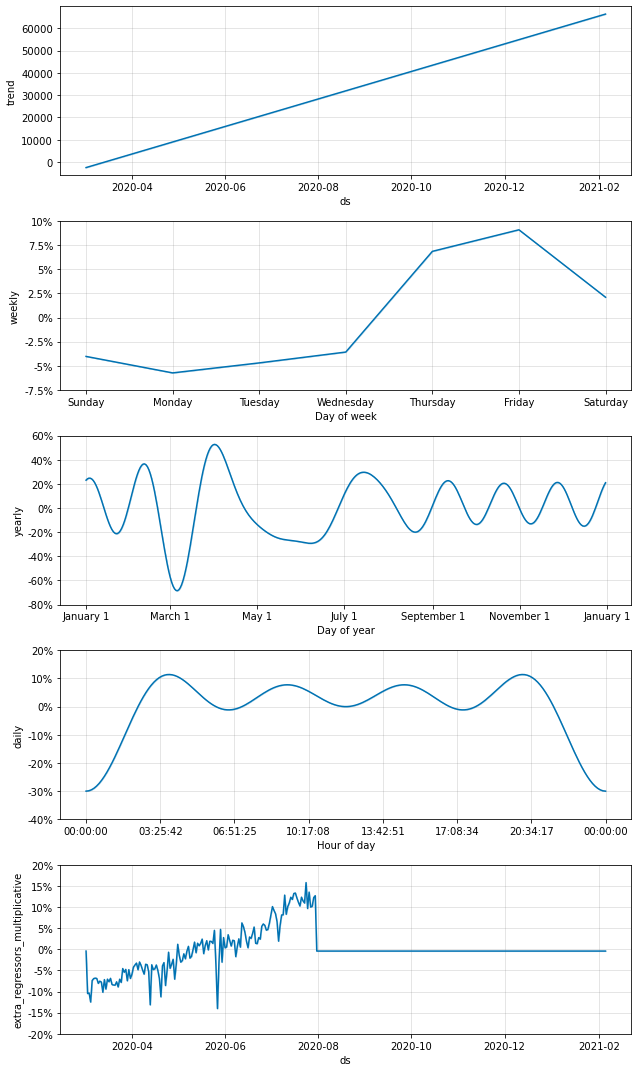

In [15]:
s_future = s_model.make_future_dataframe(periods=190, freq='D')

s_future['state_test'] = s_train['state_test']
s_future['state_test'] = s_future['state_test'].fillna(s_future['state_test'].mean())

s_future['precipitation'] = s_train['precipitation']
s_future['precipitation'] = s_future['precipitation'].fillna(s_future['state_test'].mean())

s_future['temperature'] = s_train['temperature']
s_future['temperature'] = s_future['state_test'].fillna(s_future['state_test'].mean())

s_forecast = s_model.predict(s_future)

s_plots = s_model.plot_components(s_forecast)

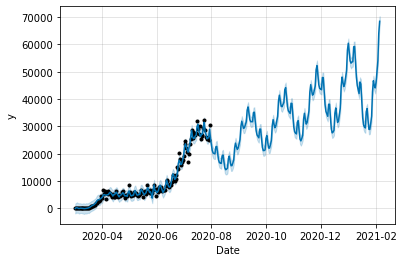

In [16]:
f, ax = plt.subplots(1)
fig = s_model.plot(s_forecast,ax=ax)
plt.xlabel('Date')
plt.show()

In [17]:
s_test_pred = s_model.predict(s_test)

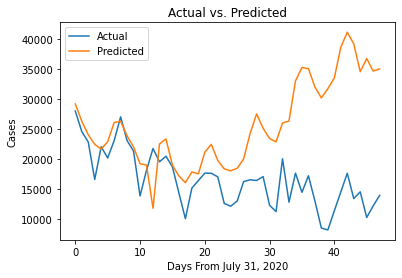

In [18]:
plt.plot(s_test['y'], label='Actual')
plt.plot(s_test_pred['yhat'], label='Predicted')
plt.xlabel('Days From July 31, 2020')
plt.ylabel('Cases')
plt.title('Actual vs. Predicted')
plt.legend()

In [19]:
mean_absolute_error(s_test['y'],abs(s_test_pred['yhat']))

9563.694460103436